In [13]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

In [9]:
METRICS_DIR='../results/metrics/'

In [17]:
csv_df = []
for csv in os.listdir(METRICS_DIR):
    df = pd.read_csv(METRICS_DIR+csv, index_col=None, header=0)
    csv_df.append(df)

In [30]:
frame = pd.concat(csv_df, axis=0, ignore_index=True)
frame

,maze_title,maze_algorithm,maze_height,maze_width,path_length,nodes_explored,nodes_available,execution_time,is_solution_found,current_memory,peak_memory,current_memory_mb,peak_memory_mb
0,maze15,A*,15,15,41,45,97,0.000657,True,4449,9617,0.004243,0.009171
1,maze89,A*,89,89,1397,2549,3871,0.039116,True,228593,502537,0.218003,0.479257
2,maze45,DFS,45,45,321,951,967,0.009723,True,48641,95787,0.046388,0.091350
3,maze21,DFS,21,21,89,191,199,0.001930,True,12529,19923,0.011949,0.019000
4,maze11,BFS,11,11,21,25,49,0.000246,True,1793,3187,0.001710,0.003039
5,maze9,DFS,9,9,13,17,31,0.000198,True,857,1315,0.000817,0.001254
6,maze101,DFS,101,101,1865,4701,4999,0.053311,True,227665,567667,0.217118,0.541369
7,maze67,DFS,67,67,953,1977,2177,0.020751,True,118673,275051,0.113175,0.262309
8,maze7,A*,7,7,13,13,17,0.000186,True,849,2201,0.000810,0.002099
9,maze67,A*,67,67,953,1887,2177,0.029051,True,163377,403729,0.155808,0.385026


In [117]:
plt.style.use('fivethirtyeight')
sns.set_palette("Paired")
plt.figure(figsize=(16, 12))

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

In [32]:
print(frame.dtypes)

maze_title            object
maze_algorithm        object
maze_height            int64
maze_width             int64
path_length            int64
nodes_explored         int64
nodes_available        int64
execution_time       float64
is_solution_found       bool
current_memory         int64
peak_memory            int64
current_memory_mb    float64
peak_memory_mb       float64
dtype: object


In [33]:
print(frame.shape)

(36, 13)


In [31]:
frame.iloc[:5,]

,maze_title,maze_algorithm,maze_height,maze_width,path_length,nodes_explored,nodes_available,execution_time,is_solution_found,current_memory,peak_memory,current_memory_mb,peak_memory_mb
0,maze15,A*,15,15,41,45,97,0.000657,True,4449,9617,0.004243,0.009171
1,maze89,A*,89,89,1397,2549,3871,0.039116,True,228593,502537,0.218003,0.479257
2,maze45,DFS,45,45,321,951,967,0.009723,True,48641,95787,0.046388,0.091350
3,maze21,DFS,21,21,89,191,199,0.001930,True,12529,19923,0.011949,0.019000
4,maze11,BFS,11,11,21,25,49,0.000246,True,1793,3187,0.001710,0.003039


In [43]:
frame.groupby(["maze_algorithm", "maze_height"])["path_length"].max()

maze_algorithm  maze_height
A*              7                13
                9                13
                11               21
                15               41
                17               73
                21               89
                25              101
                31              125
                45              321
                67              953
                89             1397
                101            1865
BFS             7                13
                9                13
                11               21
                15               41
                17               73
                21               89
                25              101
                31              125
                45              321
                67              953
                89             1397
                101            1865
DFS             7                13
                9                13
                11               21


In [40]:
frame.groupby("maze_algorithm")["path_length"].min()

maze_algorithm
A*     13
BFS    13
DFS    13
Name: path_length, dtype: int64

In [44]:
frame.groupby(["maze_algorithm", "maze_height"])["nodes_explored"].max()

maze_algorithm  maze_height
A*              7                13
                9                13
                11               21
                15               45
                17               91
                21               99
                25              115
                31              145
                45              481
                67             1887
                89             2549
                101            4299
BFS             7                13
                9                17
                11               25
                15               51
                17              121
                21              101
                25              119
                31              185
                45              567
                67             1925
                89             2577
                101            4695
DFS             7                13
                9                17
                11               25


In [42]:
frame.groupby("maze_algorithm")["nodes_explored"].min()

maze_algorithm
A*     13
BFS    13
DFS    13
Name: nodes_explored, dtype: int64

In [48]:
frame.groupby(["maze_height", "maze_algorithm"])["nodes_explored"].max()

maze_height  maze_algorithm
7            A*                  13
             BFS                 13
             DFS                 13
9            A*                  13
             BFS                 17
             DFS                 17
11           A*                  21
             BFS                 25
             DFS                 25
15           A*                  45
             BFS                 51
             DFS                 97
17           A*                  91
             BFS                121
             DFS                119
21           A*                  99
             BFS                101
             DFS                191
25           A*                 115
             BFS                119
             DFS                283
31           A*                 145
             BFS                185
             DFS                447
45           A*                 481
             BFS                567
             DFS                951


<Axes: xlabel='maze_height', ylabel='nodes_explored'>

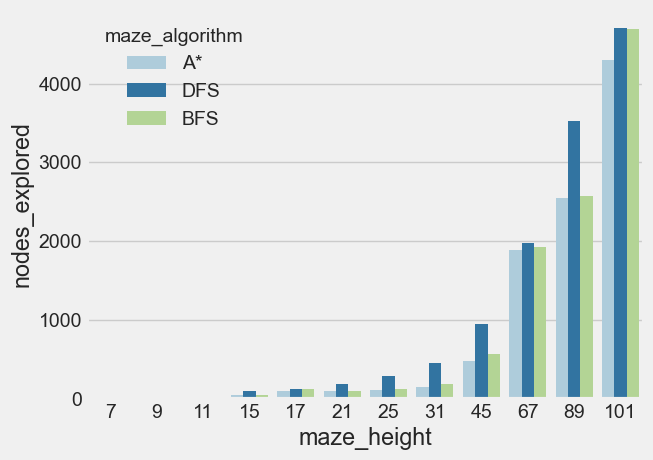

In [118]:
sns.barplot(x='maze_height', y='nodes_explored', hue='maze_algorithm', data=frame)

<Axes: xlabel='maze_height', ylabel='path_length'>

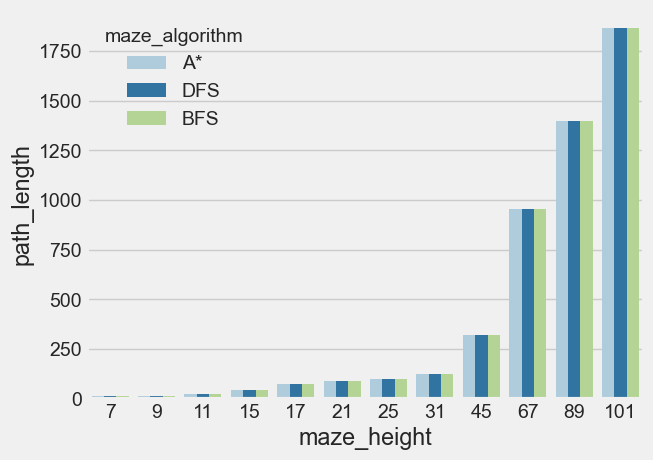

In [119]:
sns.barplot(x='maze_height', y='path_length', hue='maze_algorithm', data=frame)

<Axes: xlabel='maze_height', ylabel='execution_time'>

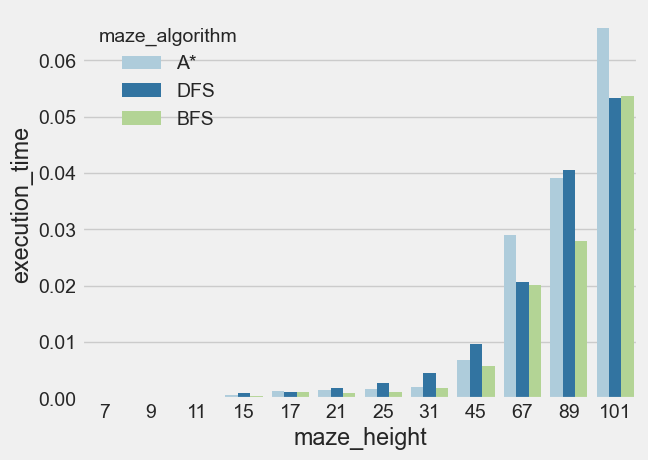

In [120]:
sns.barplot(x='maze_height', y='execution_time', hue='maze_algorithm', data=frame)

<Axes: xlabel='maze_height', ylabel='peak_memory_mb'>

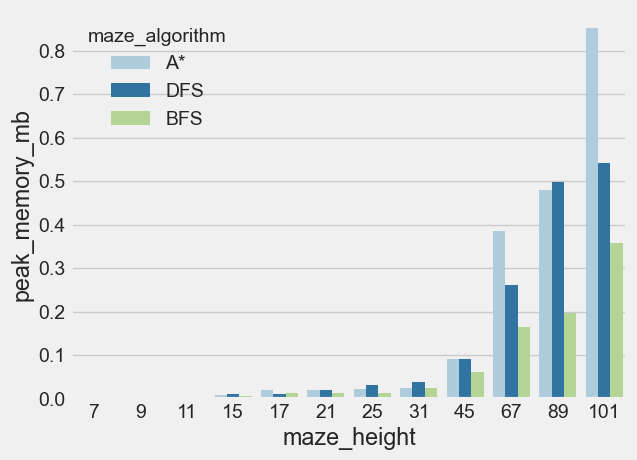

In [121]:
sns.barplot(x='maze_height', y='peak_memory_mb', hue='maze_algorithm', data=frame)

<Axes: xlabel='nodes_available', ylabel='nodes_explored'>

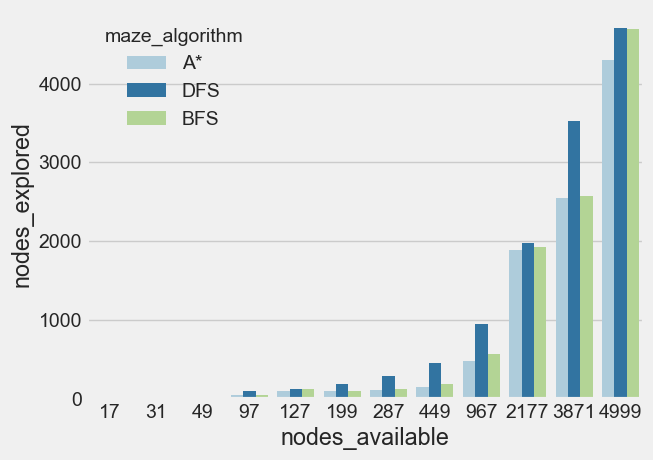

In [122]:
sns.barplot(x='nodes_available', y='nodes_explored', hue='maze_algorithm', data=frame)

In [69]:
dfs = frame[frame["maze_algorithm"] == "DFS"]
bfs = frame[frame["maze_algorithm"] == "BFS"]
astar = frame[frame["maze_algorithm"] == "A*"]

<Axes: xlabel='execution_time', ylabel='nodes_explored'>

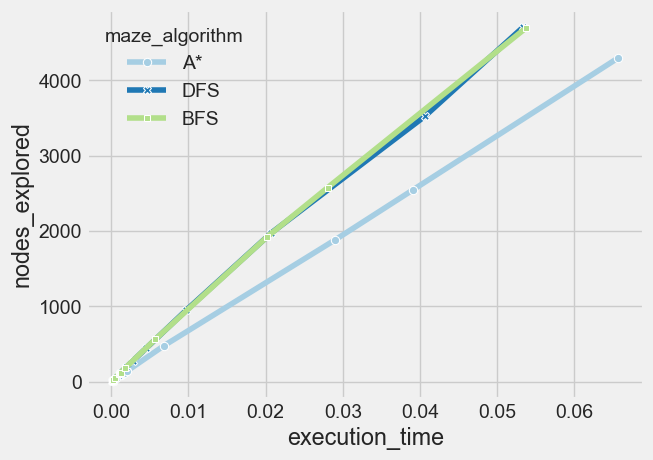

In [123]:
sns.lineplot(x="execution_time", y="nodes_explored", hue="maze_algorithm", style="maze_algorithm", markers=True, dashes=False, data=frame)

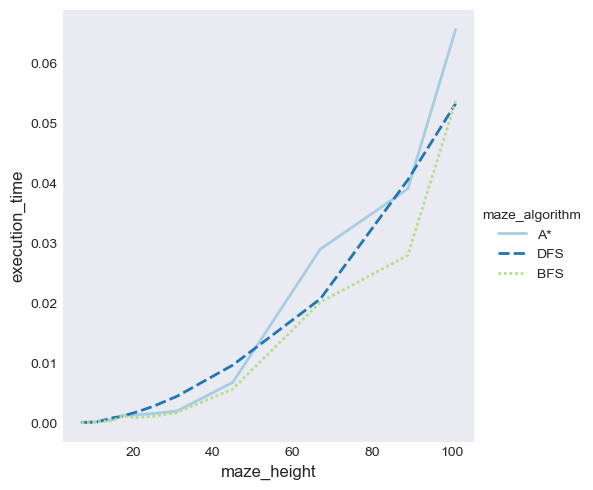

In [115]:
sns.relplot(
    data=frame, x="maze_height", y="execution_time",
    hue="maze_algorithm", style="maze_algorithm",
    kind="line"
)